Import packages and read in the data. Additionally, I chage the datatype of the totalcharges column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('../../../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df_raw['TotalCharges'] = pd.to_numeric(df_raw['TotalCharges'], errors='coerce')

In [4]:
df_raw['SeniorCitizen'] = df_raw['SeniorCitizen'].map(lambda x: 'No' if x == 0 else 'Yes')

Most columns are categorical and are one of two or three options

In [5]:
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#label encode Churn
#binary encode the yes/no
#one hot encode the rest

Make the column names easier to use and print out the number of unique values per column.

In [7]:
df_raw.columns = df_raw.columns.str.lower()

Pull out the customer id's because I don't want to lose the data, but I also don't want to graph it. I also engineered two new features from the few numerical columns. The first is the total charges a customer incured divided by how long they have had the service. I thought that people who were charged a lot in a short time might churn more. I also divided monthly charges by total charges so that higher ratios relate to higher average monthly charges.

In [8]:
cust_id = df_raw['customerid']
# df_raw['monchg_per_tenure'] = df_raw['monthlycharges'] / df_raw['tenure']
df_raw['totchg_per_tenure'] = df_raw['totalcharges'] / df_raw['tenure']
df_raw['monthly_div_tot'] = df_raw['monthlycharges'] / df_raw['totalcharges']

df_raw['partner_cont'] = df_raw['partner'].map({'No': 0, 'Yes': 1, })
df_raw['dependent_cont'] = df_raw['dependents'].map({'No': 0, 'Yes': 1, })
df_raw['single_parent'] = df_raw['partner_cont'] + df_raw['dependent_cont']
df_raw['single_parent'] = df_raw['single_parent'].map({1: 'No', 0: 'No', 2: 'Yes' })
df_raw.drop(['partner_cont', 'dependent_cont'], axis=1, inplace=True)
df_raw['phone_count'] = df_raw['phoneservice'].map({'No': 0, 'Yes': 1, })
df_raw['internet_count'] = df_raw['internetservice'].map({'No': 0, 'DSL': 1, 'Fiber optic': 1 })
df_raw['phone_and_internet'] = df_raw['phone_count'] + df_raw['internet_count']
df_raw['phone_and_internet'] = df_raw['phone_and_internet'].map({1: 'No', 0: 'No', 2: 'Yes' })
df_raw.drop(['phone_count', 'internet_count'], axis=1, inplace=True)


df = df_raw.drop('customerid',axis=1)


In [9]:
for col in df_raw.columns:
    print(col,df_raw[col].nunique())

customerid 7043
gender 2
seniorcitizen 2
partner 2
dependents 2
tenure 73
phoneservice 2
multiplelines 3
internetservice 3
onlinesecurity 3
onlinebackup 3
deviceprotection 3
techsupport 3
streamingtv 3
streamingmovies 3
contract 3
paperlessbilling 2
paymentmethod 4
monthlycharges 1585
totalcharges 6530
churn 2
totchg_per_tenure 6585
monthly_div_tot 6420
single_parent 2
phone_and_internet 2


I need to encode this data to use it in models so I made lists for each type to do.

In [10]:
ord_encode = ['gender','partner','dependents','phoneservice','multiplelines','internetservice','onlinesecurity','onlinebackup',
              'deviceprotection','techsupport','streamingtv','streamingmovies','contract','paperlessbilling','paymentmethod','single_parent','phone_and_internet','seniorcitizen']
labelencode =['churn']
num = ['tenure','monthlycharges','totalcharges','totchg_per_tenure','monthly_div_tot']

In [11]:
X = df[ord_encode].join(df[num],how='left')
y = df[labelencode]



There are some missing values that need to be filled in total charges. I am using 0 because those customers probably have not been charged yet.

In [12]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='constant',fill_value=0)

X_imp = impute.fit_transform(X)
X_proc = pd.DataFrame(X_imp,columns=X.columns)


In [13]:
# from sklearn.preprocessing import OrdinalEncoder
# #ord encode categoticals
# ordi = OrdinalEncoder(dtype=np.int)

# X_proc = ordi.fit_transform(X_proc)
# X_enc = pd.DataFrame(X_proc,columns=X.columns)


Encode churn so that the counts of yes and no can be summed easier.

In [14]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()

y_enc = lbl.fit_transform(np.array(y))

y_enc = pd.DataFrame(y_enc,columns=y.columns)

C:\Users\umbac\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
y_enc

,churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


Join the feature and target frames and then I added a counter column which helps with some groupby stuff.

In [16]:
df_enc = X.join(y_enc,how='left')

In [17]:
df_raw['counter'] = 1
df_raw.groupby(by=['paymentmethod','churn']).sum()

tenure  monthlycharges  totalcharges  \
paymentmethod             churn                                         
Bank transfer (automatic) No      60623        83653.55    4162668.15   
                          Yes      6783        20091.90     585611.75   
Credit card (automatic)   No      59471        83285.25    4126333.55   
                          Yes      6385        17946.60     545259.80   
Electronic check          No      41584        96056.25    3377326.85   
                          Yes     17954        84288.75    1567576.40   
Mailed check              No      32709        53990.70    1526913.25   
                          Yes      2481        16803.60     164478.95   

                                 totchg_per_tenure  monthly_div_tot  counter  
paymentmethod             churn                                               
Bank transfer (automatic) No          83528.607875        62.918646     1286  
                          Yes         20062.362951        42.165787      258  
Credit card (automatic)   No          83263.501792        69.894796     1290  
                          Yes         17913.842709        33.751393      232  
Electronic check          No          96050.256904       162.969154     1294  
                          Yes         84307.713889       334.839660     1071  
Mailed check              No          53711.614331       239.330414     1304  
                          Yes         16831.645921       162.316341      308

looks like larger totchg_per_tenure is related to churn. Also half of check payment methods churn. Below, I make new dataframes for churn of not. Then, I can make plots right next to each other because I couldn't figure out how to put them in one chart.

In [18]:
churned = df_raw.loc[df_raw['churn'] == 'Yes']
not_churned = df_raw.loc[df_raw['churn'] == 'No']


I started by defining the columns that I wanted to plot and taking out features that don't need to be plotted. I used a count plot for categoricals and a hist plot for numeric data because it runs faster and the bins automatically format.

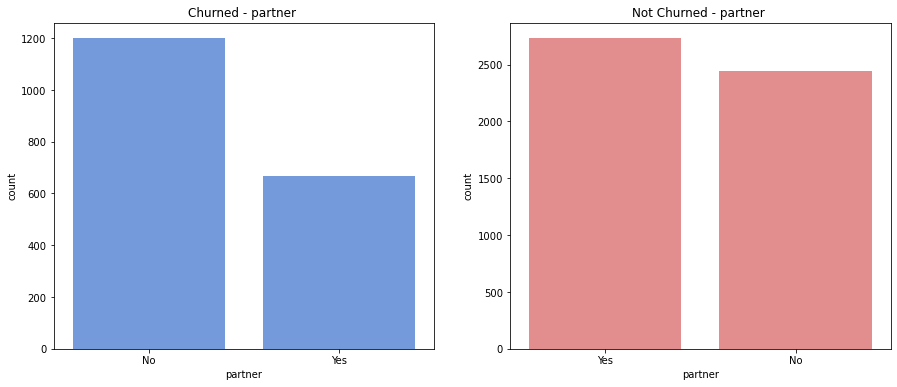

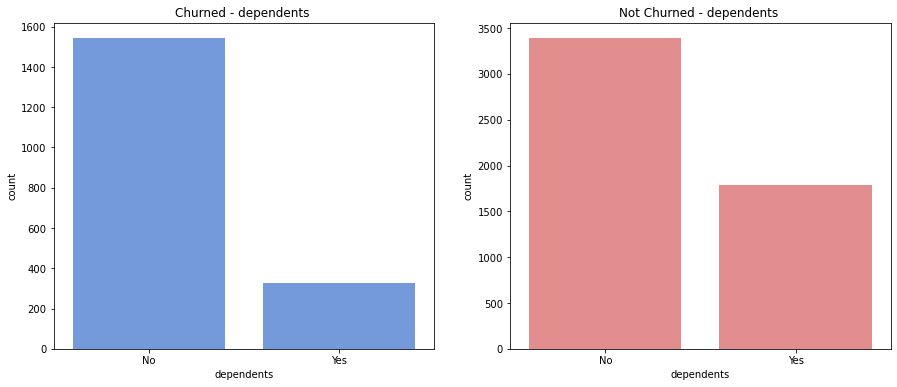

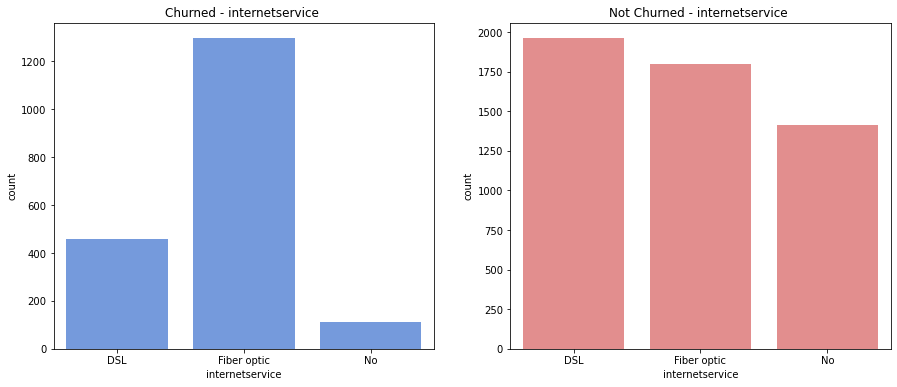

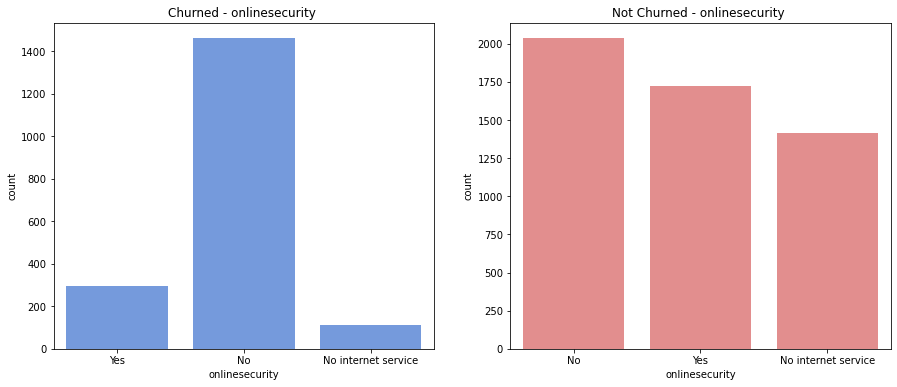

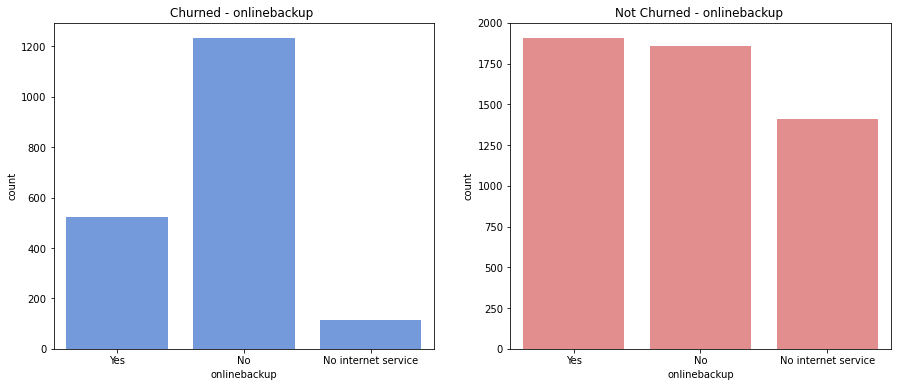

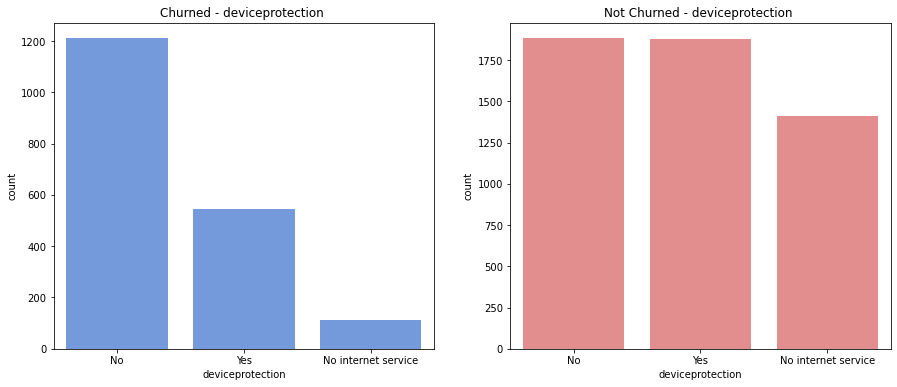

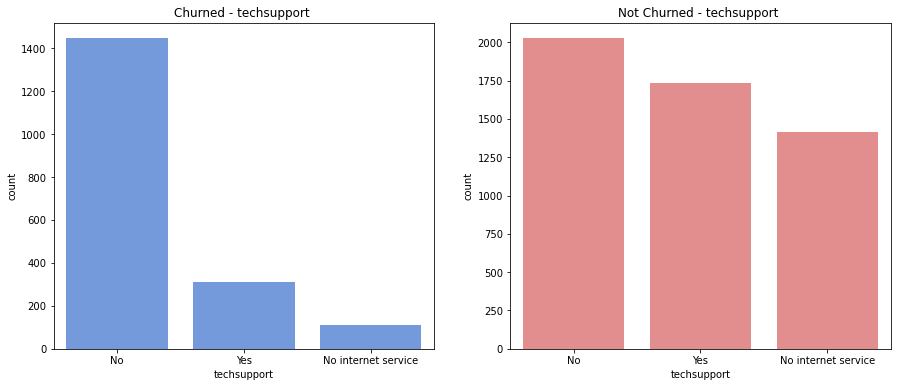

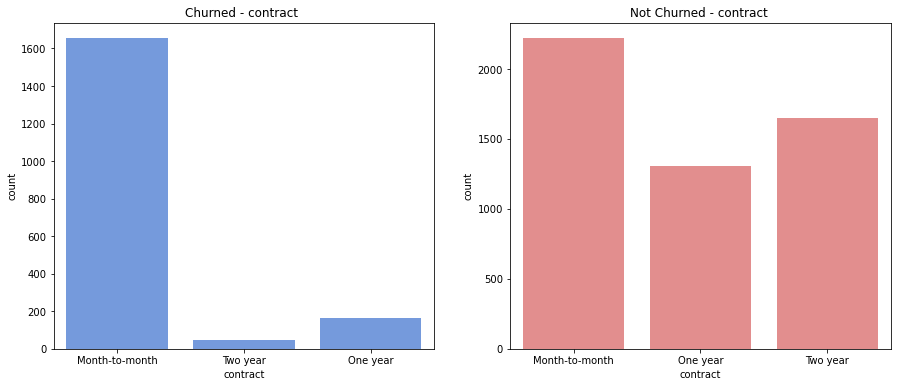

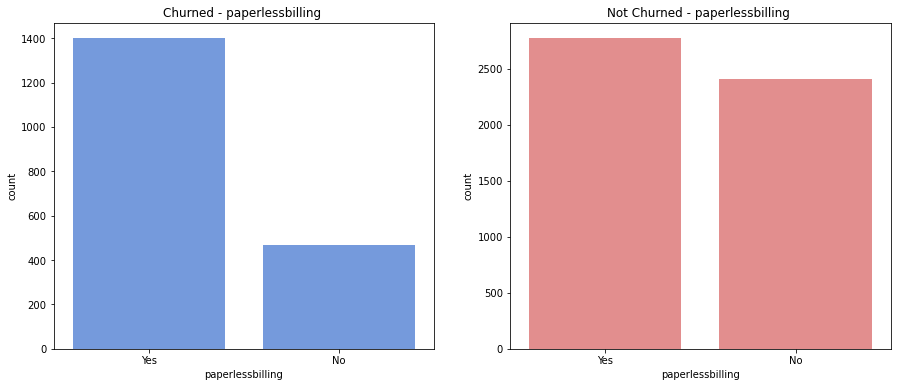

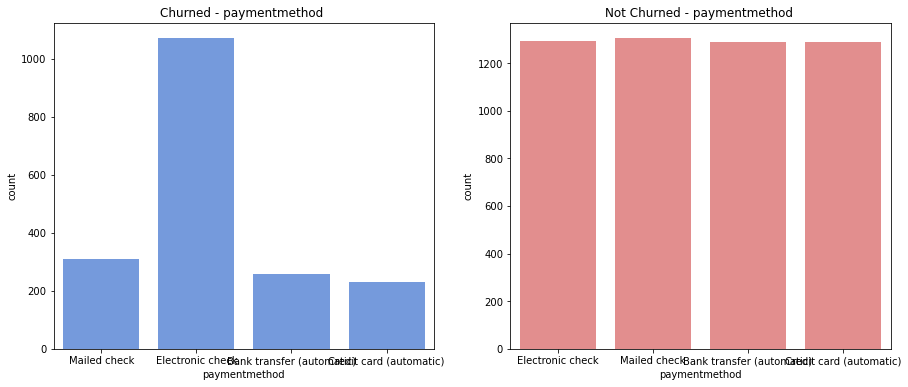

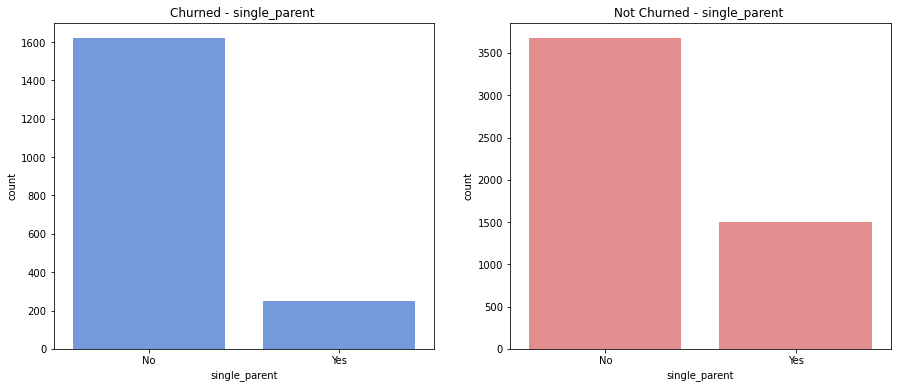

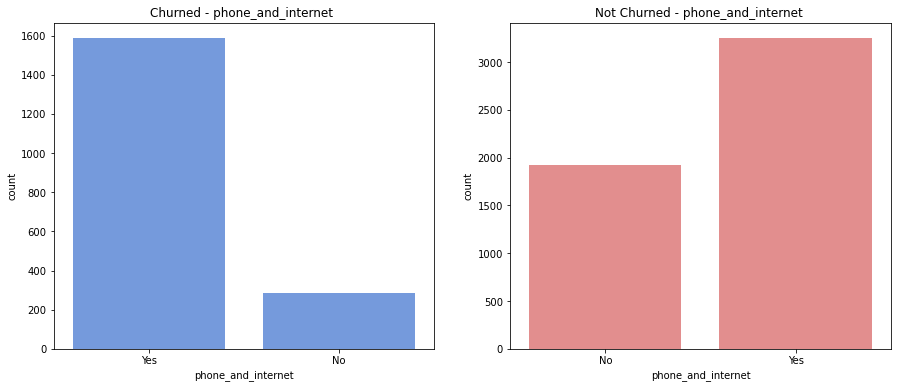

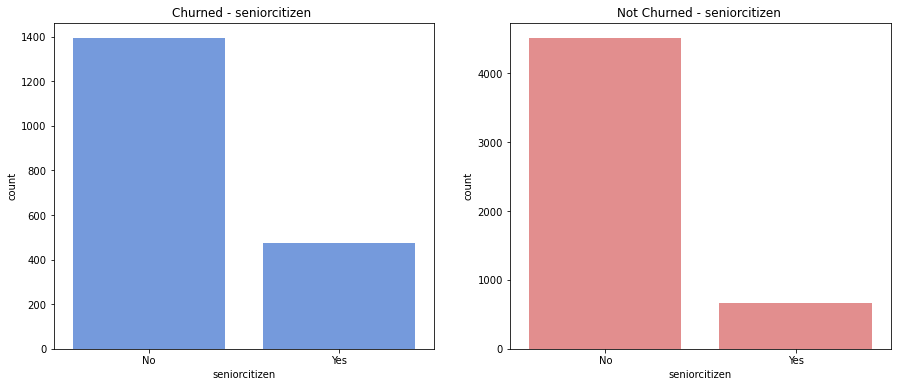

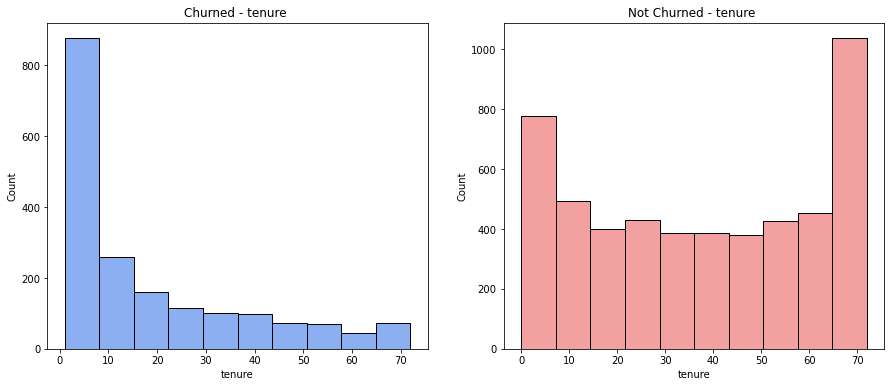

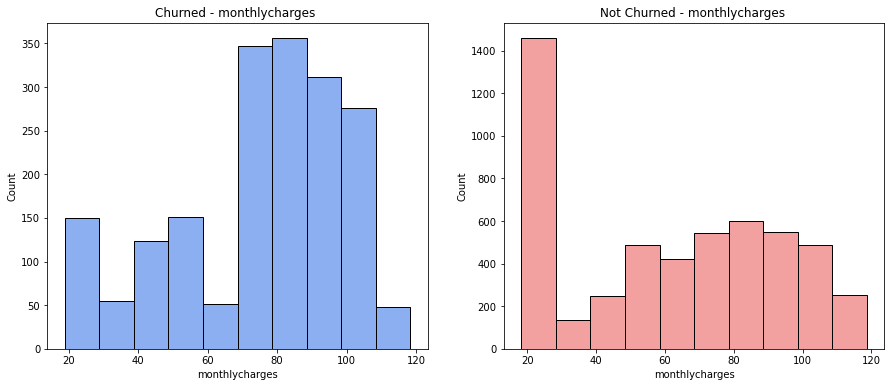

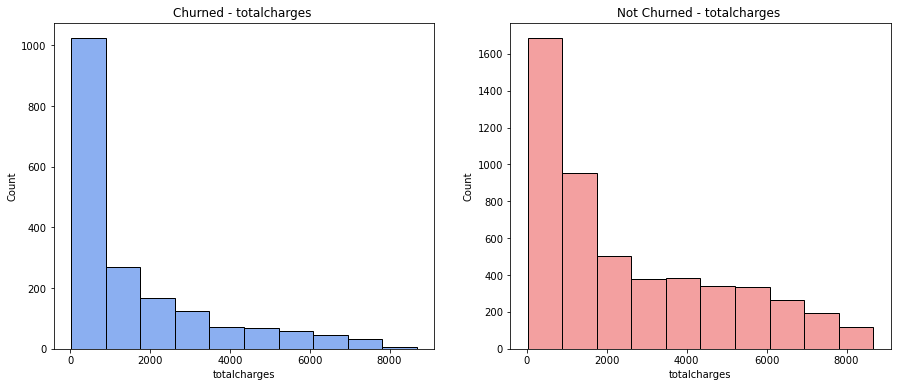

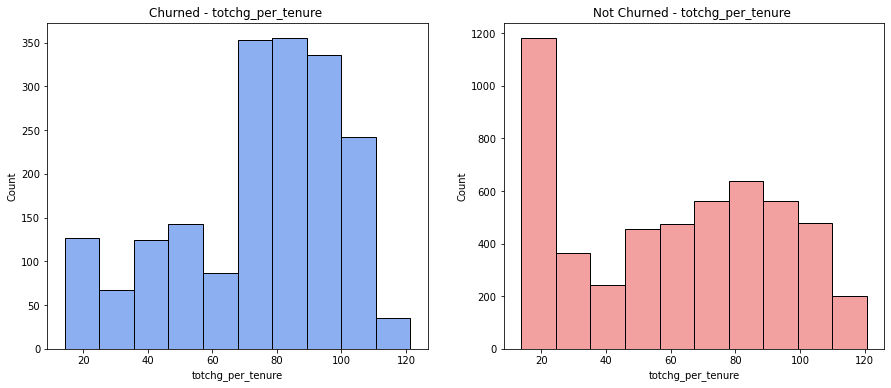

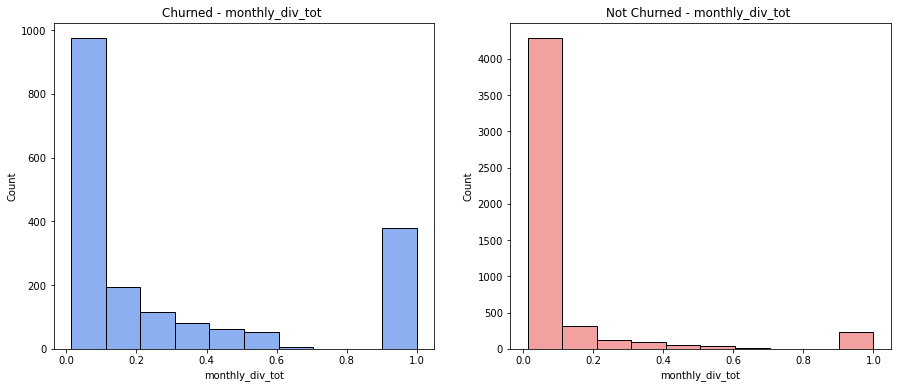

In [19]:
interesting_cols = ['partner','dependents','internetservice','onlinesecurity','onlinebackup',
              'deviceprotection','techsupport','contract','paperlessbilling','paymentmethod','single_parent','phone_and_internet','seniorcitizen']

numerics = ['tenure','monthlycharges','totalcharges','totchg_per_tenure','monthly_div_tot']

for col in churned[interesting_cols]:
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

    sns.countplot(x=col,data=churned,ax=ax[0],color='cornflowerblue',orient='h')
    sns.countplot(x=col,data=not_churned,ax=ax[1],color='lightcoral',orient='h')
    ax[0].title.set_text(f'Churned - {col} ')
    ax[1].title.set_text(f'Not Churned - {col} ')
    
for col in churned[numerics]:
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))

    sns.histplot(x=col,data=churned,ax=ax[0],color='cornflowerblue',bins=10)
    sns.histplot(x=col,data=not_churned,ax=ax[1],color='lightcoral',bins=10)
    ax[0].title.set_text(f'Churned - {col} ')
    ax[1].title.set_text(f'Not Churned - {col} ')
    


From these graphs, more people without dependents dropped their service. Also, those who hadn't been with the company long (tenure) dropped more. Most drops were month to month contracts and electronic checks. Additionally, people without a large total charge dropped more. This makes sense because people who had a low tenure wouldn't be able to get a lot of total charges.

Those who got charged a lot in a short amount of time churned more.